In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import ast
%config InlineBackend.figure_format = 'retina' 

In [2]:
hw_data = pd.read_csv("HydroWASTE_v10.csv", encoding="latin1")
hw_data

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874.0,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585.0,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105.0,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,Secondary,1,2061.969,20247446.0,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330.0,0.405,0,0,1490.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,58498,12,5648,NaN,Russia,RUS,71.640,128.855,1,71.644,...,4,Secondary,2,NaN,30032708.0,NaN,1,1,NaN,3
58498,58499,12,5649,NaN,Kenya,KEN,-0.711,34.823,1,-0.769,...,4,Secondary,2,7.502,11015070.0,4.467,0,1,NaN,3
58499,58500,12,5650,NaN,Turkey,TUR,37.860,27.842,1,37.798,...,4,Secondary,2,156.913,20660889.0,48.421,0,0,NaN,3
58500,58501,12,5651,NaN,Russia,RUS,60.080,29.949,1,60.090,...,4,Secondary,2,NaN,20162898.0,NaN,1,1,NaN,3


In [3]:
hw_us = hw_data[hw_data["COUNTRY"] == "United States"]
hw_us.to_csv("HydroWASTE_v10_US.csv", index=False)

In [4]:
hw_us.shape

(14819, 25)

In [5]:
gdf_hw_us = gpd.GeoDataFrame(
    hw_us, geometry=gpd.points_from_xy(hw_us.LON_WWTP, hw_us.LAT_WWTP)
)
gdf_hw_us.crs = {"init": "epsg:4326"}
gdf_hw_us.reset_index(drop=True, inplace=True)
gdf_hw_us.head()

/Users/yj/Documents/Duke MIDS/0_Capstone/00_github/wastewater_treatment/.conda/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,geometry
0,24972,2,1000002001,AKRON LAGOON,United States,USA,32.886,-87.740,2,32.906,...,Secondary,1,111417.486,70745431.0,292.887,0,0,416.394,1,POINT (-87.74000 32.88600)
1,24973,2,1000003001,ALABASTER WWTP,United States,USA,33.253,-86.815,2,33.310,...,Advanced,1,125.545,70736924.0,16.370,0,0,28769.040,1,POINT (-86.81500 33.25300)
2,24974,2,1000004001,ALEXANDER CITY SUGAR CREEK WWTP,United States,USA,32.901,-85.951,2,32.852,...,Advanced,1,529.921,70747012.0,108.915,0,0,32175.900,1,POINT (-85.95100 32.90100)
3,24975,2,1000004002,ALEXANDER CITY COLEY CREEK WWTP,United States,USA,32.930,-85.882,2,32.856,...,Secondary,1,1916.245,70747012.0,126.707,0,0,7381.530,1,POINT (-85.88200 32.93000)
4,24976,2,1000005001,ALTOONA LAGOON,United States,USA,34.038,-86.332,2,34.106,...,Secondary,1,1519.498,70718545.0,1.131,0,0,264.978,1,POINT (-86.33200 34.03800)


In [8]:
# us boundary
us_boundary_path = "/Users/sukhpreetsahota/Desktop/Duke/2nd Year/Capstone Project/Project Scripts/solar_wastewater/00_source_data/US_State_Boundaries"
us_boundary = gpd.read_file(us_boundary_path)
us_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# spatial join
gdf_hw_us = gdf_hw_us.to_crs(us_boundary.crs)
gdf_hw_us.crs

gdf_hw_us = gpd.sjoin(gdf_hw_us, us_boundary, how="inner", op="within")
gdf_hw_us.head()

/Users/yj/Documents/Duke MIDS/0_Capstone/00_github/wastewater_treatment/.conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,MONTH_ADM,DAY_ADM,YEAR_ADM,TYPE,POP,SQ_MILES,PRIM_MILES,Shape_Leng,Shape__Are,Shape__Len
0,24972,2,1000002001,AKRON LAGOON,United States,USA,32.886,-87.740,2,32.906,...,December,14,1819,Land,4779736,51645.9,1388.9,21.641733,12.879164,21.641733
1,24973,2,1000003001,ALABASTER WWTP,United States,USA,33.253,-86.815,2,33.310,...,December,14,1819,Land,4779736,51645.9,1388.9,21.641733,12.879164,21.641733
2,24974,2,1000004001,ALEXANDER CITY SUGAR CREEK WWTP,United States,USA,32.901,-85.951,2,32.852,...,December,14,1819,Land,4779736,51645.9,1388.9,21.641733,12.879164,21.641733
3,24975,2,1000004002,ALEXANDER CITY COLEY CREEK WWTP,United States,USA,32.930,-85.882,2,32.856,...,December,14,1819,Land,4779736,51645.9,1388.9,21.641733,12.879164,21.641733
4,24976,2,1000005001,ALTOONA LAGOON,United States,USA,34.038,-86.332,2,34.106,...,December,14,1819,Land,4779736,51645.9,1388.9,21.641733,12.879164,21.641733


In [10]:
hw_us_cnt_by_state = gdf_hw_us.groupby("NAME").size().to_frame("count").reset_index()

## OSM

### Read Data

In [20]:
osm_us = pd.read_csv("/Users/sukhpreetsahota/Desktop/Duke/2nd Year/Capstone Project/Satellite Imagery with Bounding Box/00_WWTP_all_states.csv")
osm_us = osm_us.loc[:, ["state", "WWTP_name", "centroid"]]

In [22]:
osm_us.drop_duplicates(inplace=True)
osm_us.reset_index(drop=True, inplace=True)
osm_us[['longitude', 'latitude']] = osm_us['centroid'].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')

# Convert the extracted strings to float for geographical coordinates
osm_us['longitude'] = osm_us['longitude'].astype(float)
osm_us['latitude'] = osm_us['latitude'].astype(float)
osm_us

,state,WWTP_name,centroid,longitude,latitude
0,Alabama,Huntsville Wastewater Plant,POINT (-86.59937466800963 34.67064623809767),-86.599375,34.670646
1,Alabama,Aldridge Creek Wastewater Treatment Plant,POINT (-86.55951394454004 34.589007005761225),-86.559514,34.589007
2,Alabama,Plant_120359894,POINT (-85.00886855850221 32.49348278980464),-85.008869,32.493483
3,Alabama,City Of NorthPort Waste Treatment Plant,POINT (-87.5886537115451 33.214750353257934),-87.588654,33.214750
4,Alabama,Plant_202553742,POINT (-86.60098708109892 33.61983296841157),-86.600987,33.619833
...,...,...,...,...,...
11277,Wyoming,City of Gillette Wastewater Treatment Plant,POINT (-105.44605168392351 44.26639388177673),-105.446052,44.266394
11278,Wyoming,Plant_907138742,POINT (-104.29042721985756 41.92109281213378),-104.290427,41.921093
11279,Wyoming,Plant_1066607492,POINT (-106.29397892377395 42.862402453513965),-106.293979,42.862402
11280,Wyoming,Plant_1084536478,POINT (-106.9606296827275 44.822789042862816),-106.960630,44.822789


### Plot OSM Map

TypeError: no numeric data to plot

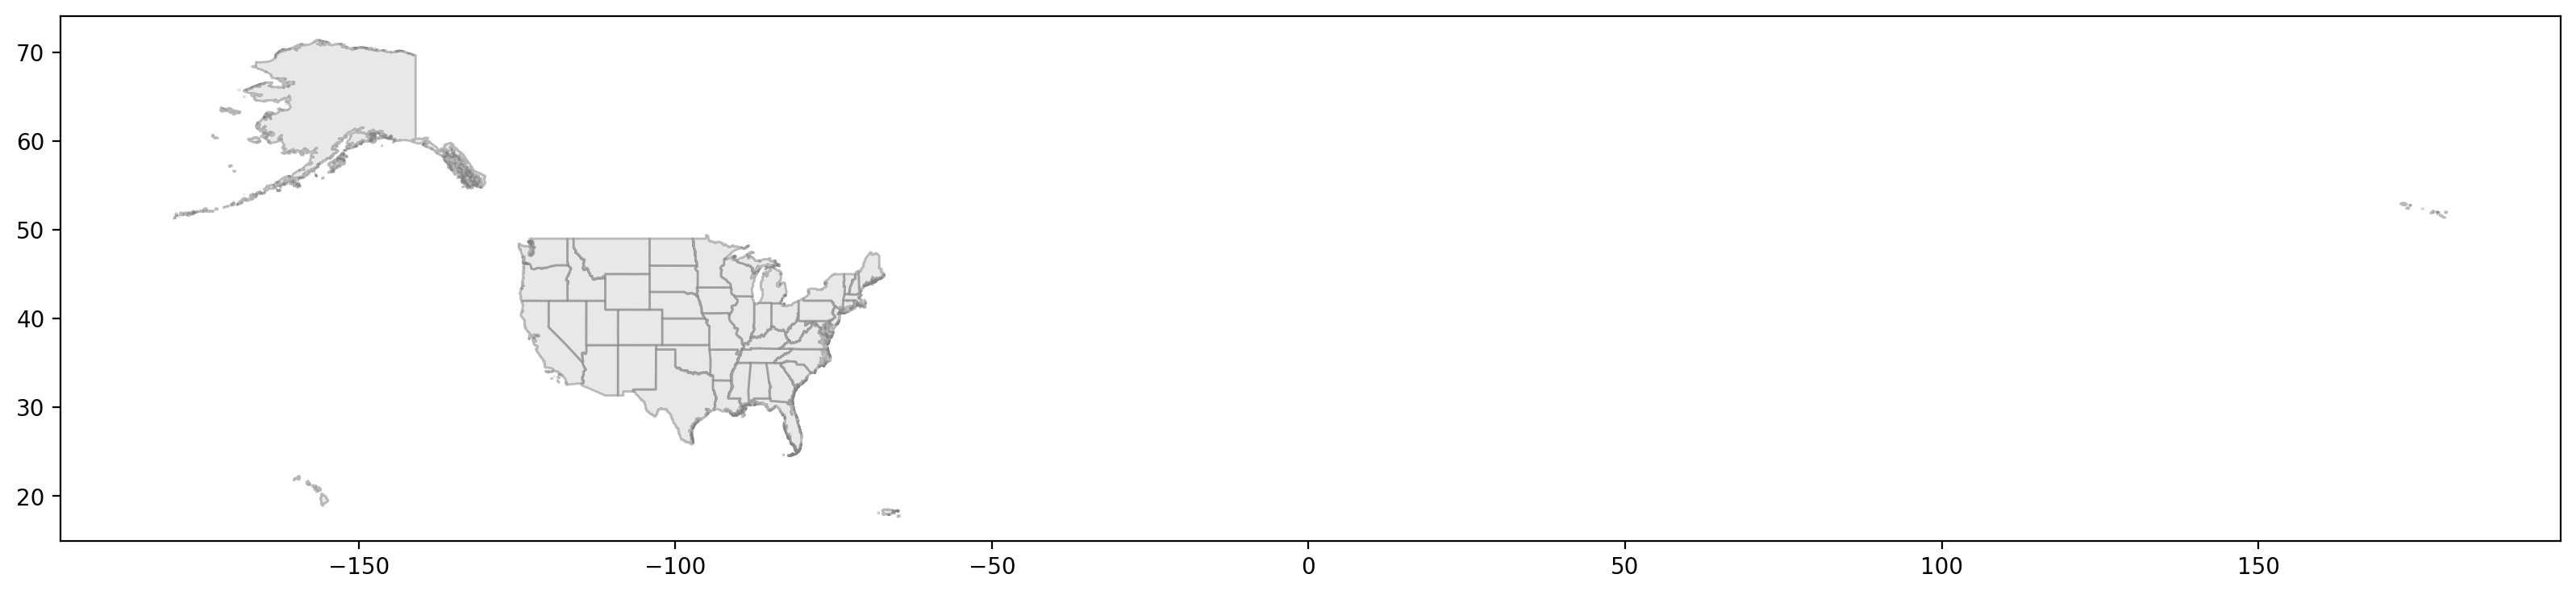

In [11]:
# plot the points and the boundary
import matplotlib.pyplot as plt

green_color = "##288a1c"

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
us_boundary.plot(ax=ax, color="lightgrey", alpha=0.5, edgecolor="grey")
osm_us.plot(ax=ax, color=green_color, markersize=2)
# set x and y axis limits
ax.set_xlim(-128, -65)
ax.set_ylim(24, 50)
# plt.title("WWTP in the US from HydroWASTE")
plt.axis("off")
plt.show()

## calculate distance

### CA

In [11]:
def extract_lon_lat(centroid_str):
    # Remove 'POINT (' and ')' from the string
    clean_str = centroid_str.replace("POINT (", "").replace(")", "")
    # Split the string on space to separate the coordinates
    lon, lat = map(float, clean_str.split(" "))
    return lon, lat


# Apply the function to the 'centroid' column and create new columns for longitude and latitude
df_ca_yes_maybe = pd.read_csv(
    "/Users/yj/Documents/Duke MIDS/0_Capstone/00_github/wastewater_treatment/gdf_CA_Yes_and_Maybe.csv",
    index_col=0,
)
df_ca_yes_maybe["osm_longitude"], df_ca_yes_maybe["osm_latitude"] = zip(
    *df_ca_yes_maybe["centroid"].apply(extract_lon_lat)
)
df_ca_yes_maybe_2 = df_ca_yes_maybe.drop(columns=["centroid", "geometry"])
df_ca_yes_maybe_2.reset_index(drop=True, inplace=True)
df_ca_yes_maybe_2

,WWTP_name,osm_longitude,osm_latitude
0,Plant_24298754,-121.807618,37.691205
1,Plant_24396910,-121.780253,36.799902
2,EBMUD Wastewater Treatment Plant,-122.295253,37.825121
3,Hyperion Wastewater Treatment Plant,-118.430064,33.925741
4,Sunnyvale Water Pollution Control Plant,-122.015265,37.418974
...,...,...,...
294,Plant_1118189719,-124.194542,40.765620
295,Riverside Water Quality Control Plant,-117.458295,33.962657
296,West County Wastewater - Water Quality & Resou...,-122.377169,37.964215
297,Plant_1180546479,-122.360351,38.393626


In [12]:
df_hw_ca = gdf_hw_us[gdf_hw_us["NAME"] == "California"]
df_hw_ca = df_hw_ca.loc[:, ["WWTP_NAME", "LAT_WWTP", "LON_WWTP", "NAME"]]
df_hw_ca.columns = ["hw_WWTP_NAME", "hw_latitude", "hw_longitude", "state"]
df_hw_ca.reset_index(drop=True, inplace=True)
df_hw_ca

,hw_WWTP_NAME,hw_latitude,hw_longitude,state
0,TULELAKE STP,41.948,-121.470,California
1,MONTAGUE WWTF,41.725,-122.533,California
2,WEAVERVILLE WWTF,40.743,-122.954,California
3,Westport STF,39.683,-123.762,California
4,BLUE LAKE WWTF,40.971,-123.885,California
...,...,...,...,...
477,Borrego Springs WWRF,33.199,-116.299,California
478,OSO CREEK WWRF,33.597,-117.656,California
479,MNWD WWTP 3 A,33.571,-117.674,California
480,Los Alisos WRP,33.463,-117.684,California


In [13]:
# calculate the closest hw point for each osm point
from scipy.spatial import cKDTree


def closest_point(point, points):
    """Find closest point from a list of points."""
    return points[cKDTree(points).query(point)[1]]


# Create a list of points
osm_points = list(
    zip(df_ca_yes_maybe_2["osm_longitude"], df_ca_yes_maybe_2["osm_latitude"])
)
hw_points = list(zip(df_hw_ca["hw_longitude"], df_hw_ca["hw_latitude"]))

# Find the closest point for osm points
closest_hw_points = [closest_point(p, hw_points) for p in osm_points]

# add to osm df
df_ca_yes_maybe_2["hw_longitude"], df_ca_yes_maybe_2["hw_latitude"] = zip(
    *closest_hw_points
)

# calculate the distance between osm and hw points
from geopy.distance import geodesic


def calculate_distance(row):
    osm_point = (row["osm_latitude"], row["osm_longitude"])
    hw_point = (row["hw_latitude"], row["hw_longitude"])
    return geodesic(osm_point, hw_point).kilometers


df_ca_yes_maybe_2["distance"] = df_ca_yes_maybe_2.apply(calculate_distance, axis=1)
df_ca_yes_maybe_2.sort_values(by="distance", ascending=True, inplace=True)
df_ca_yes_maybe_2.reset_index(drop=True, inplace=True)
df_ca_yes_maybe_2

,WWTP_name,osm_longitude,osm_latitude,hw_longitude,hw_latitude,distance
0,Plant_439820568,-123.814811,39.439016,-123.815,39.439,0.016377
1,SMD3,-121.134033,38.797846,-121.134,38.798,0.017336
2,Tapia Wastewater Treatment Plant,-118.708916,34.081850,-118.709,34.082,0.018368
3,Plant_212505830,-120.687624,35.649109,-120.688,35.649,0.036155
4,Deer Creek Wastewater Treatment Plant,-120.984446,38.627714,-120.984,38.628,0.050122
...,...,...,...,...,...,...
294,Plant_316112763,-118.373031,37.355788,-117.929,37.289,40.048319
295,Plant_152079640,-116.889942,35.421036,-117.249,35.178,42.350713
296,Desert Center Wastewater Ponds,-115.381000,33.742743,-115.706,33.383,50.027686
297,Plant_333132612,-116.665335,35.250599,-117.249,35.178,53.749273


<Axes: ylabel='Frequency'>

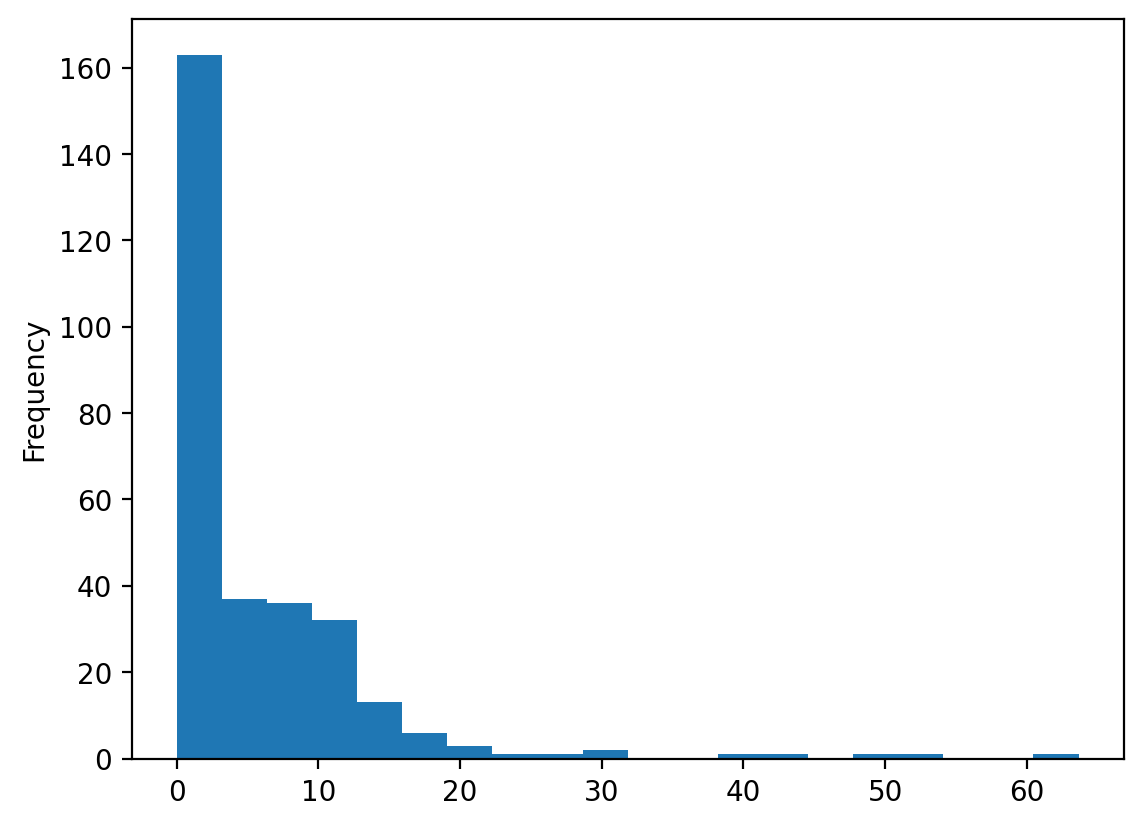

In [14]:
df_ca_yes_maybe_2["distance"].plot(kind="hist", bins=20)

### TX

In [15]:
# Apply the function to the 'centroid' column and create new columns for longitude and latitude
df_tx_yes_maybe = pd.read_csv(
    "/Users/yj/Documents/Duke MIDS/0_Capstone/00_github/wastewater_treatment/gdf_texas_Yes_and_Maybe.csv",
    index_col=0,
)
df_tx_yes_maybe["osm_longitude"], df_tx_yes_maybe["osm_latitude"] = zip(
    *df_tx_yes_maybe["centroid"].apply(extract_lon_lat)
)
df_tx_yes_maybe_2 = df_tx_yes_maybe.drop(columns=["centroid"])
df_tx_yes_maybe_2.reset_index(drop=True, inplace=True)
df_tx_yes_maybe_2

,WWTP_name,osm_longitude,osm_latitude
0,Plant_27449381,-96.772237,32.733895
1,City of Leander Wastewater Treatment Plant,-97.841135,30.580418
2,Plant_43545879,-94.919884,29.757841
3,Plant_45099212,-95.043765,29.609616
4,Plant_46773427,-95.237948,29.603219
...,...,...,...
297,Peninsula Water Reclamation Plant,-96.988792,33.207951
298,Plant_1187363792,-97.191866,31.579751
299,Mt Carmel Water Treatment Plant,-97.207909,31.548248
300,Hurst Creek M.U.D. Water Treatment,-97.995071,30.349823


In [16]:
df_hw_tx = gdf_hw_us[gdf_hw_us["NAME"] == "Texas"]
df_hw_tx = df_hw_tx.loc[:, ["WWTP_NAME", "LAT_WWTP", "LON_WWTP", "NAME"]]
df_hw_tx.columns = ["hw_WWTP_NAME", "hw_latitude", "hw_longitude", "state"]
df_hw_tx.reset_index(drop=True, inplace=True)
df_hw_tx

,hw_WWTP_NAME,hw_latitude,hw_longitude,state
0,TEXICO MUNIC WWT PLANT,32.391,-103.048,Texas
1,SUNLAND PARK WWTP,31.863,-106.625,Texas
2,Temple Belton WWTP,31.038,-97.459,Texas
3,Waco Regional WWTP,31.519,-97.067,Texas
4,Central WWTP TRA,32.779,-96.926,Texas
...,...,...,...,...
546,Buffalo Springs,31.944,-98.502,Texas
547,Boyd Prison WWTP,31.623,-96.297,Texas
548,Mauriceville MUD,30.227,-93.807,Texas
549,New Territory Regional North WWTP,29.578,-95.696,Texas


In [17]:
# calculate the closest hw point for each osm point
osm_points = list(
    zip(df_tx_yes_maybe_2["osm_longitude"], df_tx_yes_maybe_2["osm_latitude"])
)
hw_points = list(zip(df_hw_tx["hw_longitude"], df_hw_tx["hw_latitude"]))

# Find the closest point for osm points
closest_hw_points = [closest_point(p, hw_points) for p in osm_points]

# add to osm df
df_tx_yes_maybe_2["hw_longitude"], df_tx_yes_maybe_2["hw_latitude"] = zip(
    *closest_hw_points
)

df_tx_yes_maybe_2["distance"] = df_tx_yes_maybe_2.apply(calculate_distance, axis=1)
df_tx_yes_maybe_2.sort_values(by="distance", ascending=True, inplace=True)
df_tx_yes_maybe_2.reset_index(drop=True, inplace=True)
df_tx_yes_maybe_2

,WWTP_name,osm_longitude,osm_latitude,hw_longitude,hw_latitude,distance
0,Goliad Wastewater Treatment Plant,-97.396138,28.663033,-97.396,28.663,0.014021
1,South Austin Regional Wastewater Treatment Plant,-97.605028,30.207783,-97.605,30.208,0.024210
2,City of Kerrville Water Reclamation Plant,-99.112246,30.024821,-99.112,30.025,0.030971
3,Plant_630719688,-95.216384,29.556983,-95.216,29.557,0.037281
4,Plant_691676285,-95.482561,32.634990,-95.482,32.635,0.052645
...,...,...,...,...,...,...
297,Plant_836919157,-98.654119,30.742667,-98.369,30.583,32.557809
298,Breckenridge Water Treatment Plant,-98.901605,32.750775,-99.157,32.546,33.013179
299,Plant_632171471,-101.344101,35.703308,-100.928,35.572,40.405954
300,Plant_1168463141,-102.624777,32.709177,-102.527,32.316,44.559174


<Axes: ylabel='Frequency'>

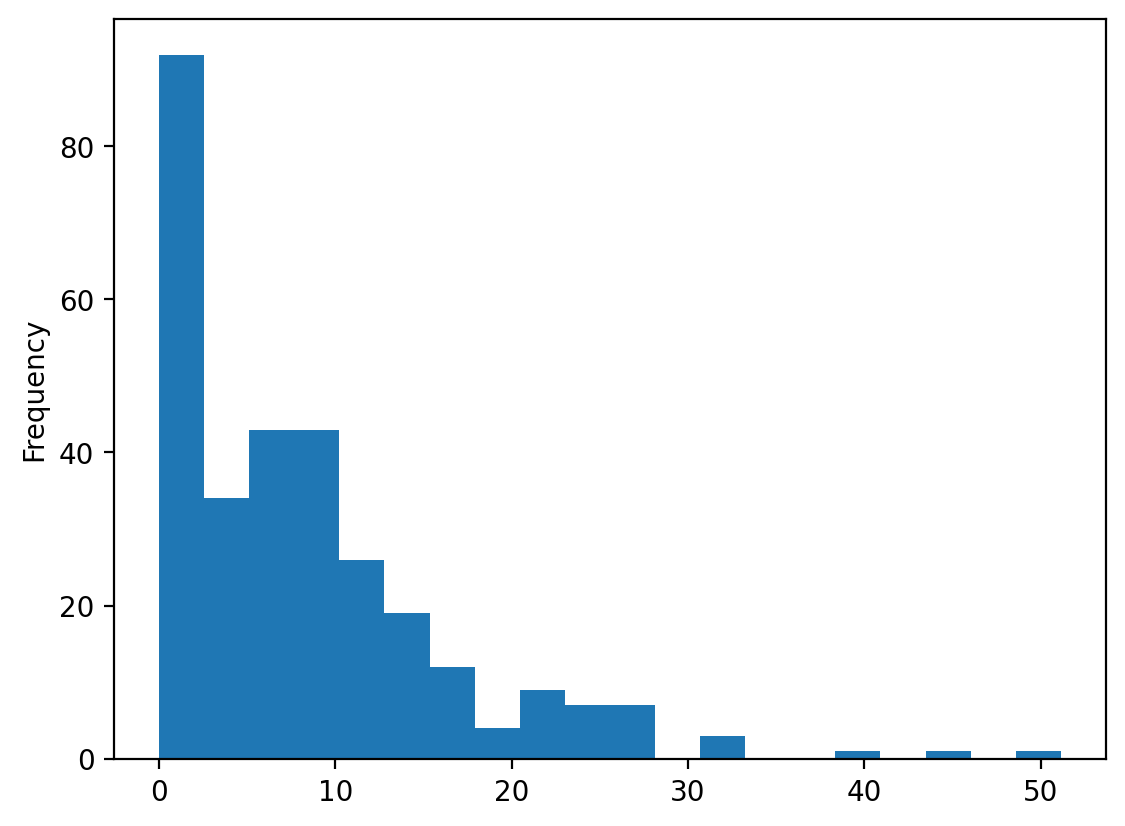

In [18]:
df_tx_yes_maybe_2["distance"].plot(kind="hist", bins=20)

combine the 2 dfs

In [19]:
df_ca_yes_maybe_2.loc[:, "state"] = "California"
df_tx_yes_maybe_2.loc[:, "state"] = "Texas"
df_yes_maybe_ca_tx = pd.concat([df_ca_yes_maybe_2, df_tx_yes_maybe_2])
df_yes_maybe_ca_tx.reset_index(drop=True, inplace=True)
df_yes_maybe_ca_tx

,WWTP_name,osm_longitude,osm_latitude,hw_longitude,hw_latitude,distance,state
0,Plant_439820568,-123.814811,39.439016,-123.815,39.439,0.016377,California
1,SMD3,-121.134033,38.797846,-121.134,38.798,0.017336,California
2,Tapia Wastewater Treatment Plant,-118.708916,34.081850,-118.709,34.082,0.018368,California
3,Plant_212505830,-120.687624,35.649109,-120.688,35.649,0.036155,California
4,Deer Creek Wastewater Treatment Plant,-120.984446,38.627714,-120.984,38.628,0.050122,California
...,...,...,...,...,...,...,...
596,Plant_836919157,-98.654119,30.742667,-98.369,30.583,32.557809,Texas
597,Breckenridge Water Treatment Plant,-98.901605,32.750775,-99.157,32.546,33.013179,Texas
598,Plant_632171471,-101.344101,35.703308,-100.928,35.572,40.405954,Texas
599,Plant_1168463141,-102.624777,32.709177,-102.527,32.316,44.559174,Texas


In [20]:
df_yes_maybe_ca_tx.loc[106, :]

WWTP_name        Clear Creek Wastewater Treatment Plant
osm_longitude                               -122.363781
osm_latitude                                  40.499087
hw_longitude                                   -122.356
hw_latitude                                      40.497
distance                                       0.699139
state                                        California
Name: 106, dtype: object

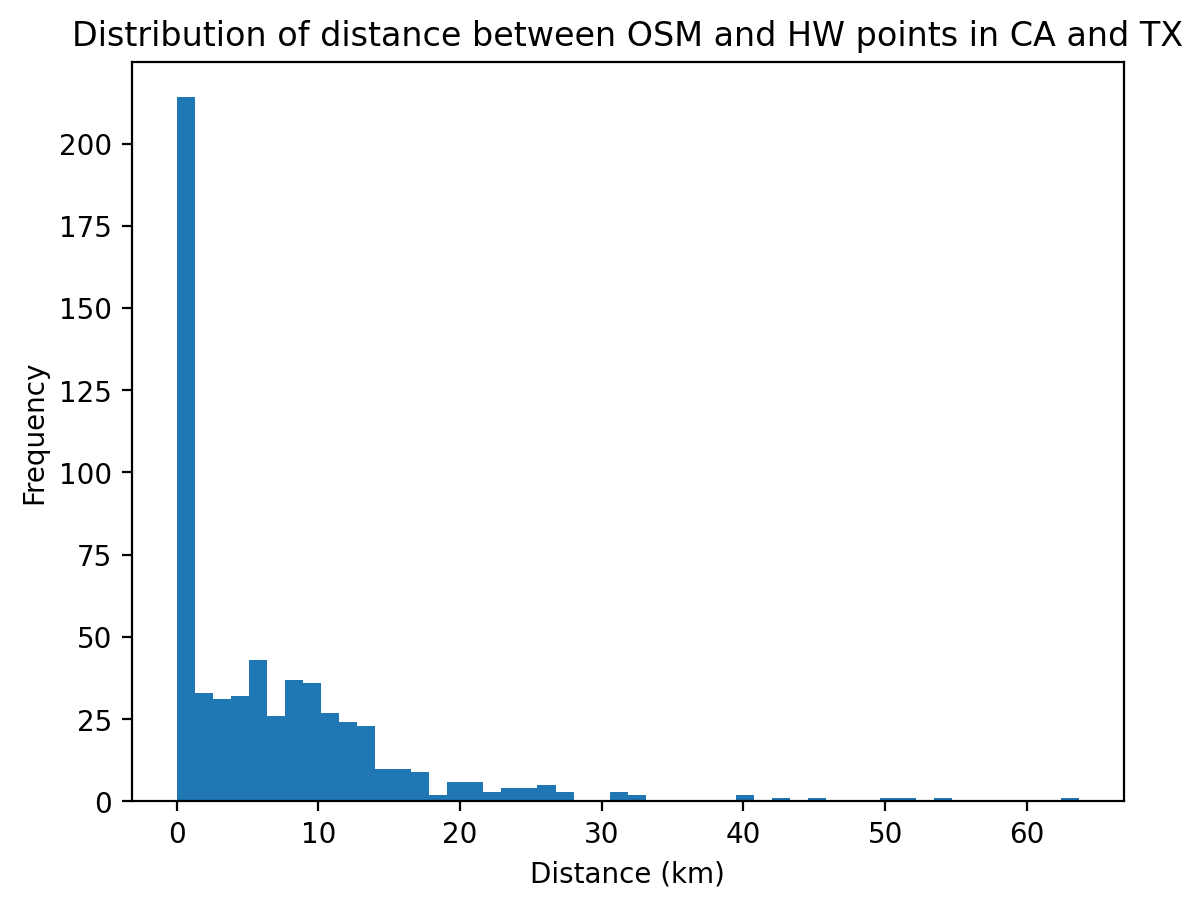

In [21]:
df_yes_maybe_ca_tx.distance.plot(kind="hist", bins=50)
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.title("Distribution of distance between OSM and HW points in CA and TX")
plt.show()

In [22]:
# put into bins 0-10, 10-20, 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-90, 90-100, 100+
bins = [0, 1, 1000]
labels = [
    "0-1",
    ">1",
]

# add a new column to the dataframe
df_yes_maybe_ca_tx["distance_bin"] = pd.cut(
    df_yes_maybe_ca_tx["distance"], bins=bins, labels=labels, right=True
)
df_yes_maybe_ca_tx

,WWTP_name,osm_longitude,osm_latitude,hw_longitude,hw_latitude,distance,state,distance_bin
0,Plant_439820568,-123.814811,39.439016,-123.815,39.439,0.016377,California,0-1
1,SMD3,-121.134033,38.797846,-121.134,38.798,0.017336,California,0-1
2,Tapia Wastewater Treatment Plant,-118.708916,34.081850,-118.709,34.082,0.018368,California,0-1
3,Plant_212505830,-120.687624,35.649109,-120.688,35.649,0.036155,California,0-1
4,Deer Creek Wastewater Treatment Plant,-120.984446,38.627714,-120.984,38.628,0.050122,California,0-1
...,...,...,...,...,...,...,...,...
596,Plant_836919157,-98.654119,30.742667,-98.369,30.583,32.557809,Texas,>1
597,Breckenridge Water Treatment Plant,-98.901605,32.750775,-99.157,32.546,33.013179,Texas,>1
598,Plant_632171471,-101.344101,35.703308,-100.928,35.572,40.405954,Texas,>1
599,Plant_1168463141,-102.624777,32.709177,-102.527,32.316,44.559174,Texas,>1


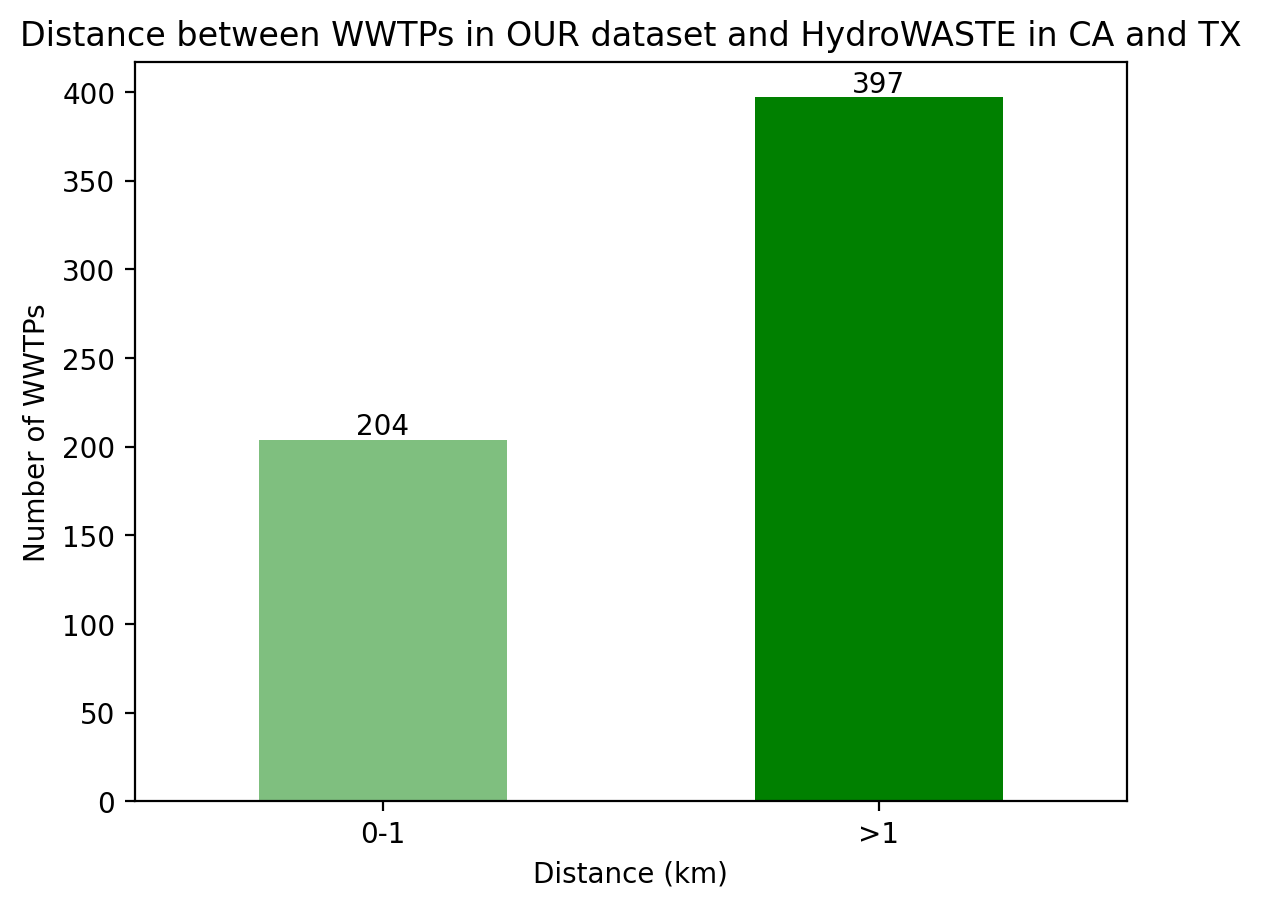

In [32]:
# count each bin
df_yes_maybe_ca_tx["distance_bin"].value_counts().sort_values(ascending=True).plot(
    kind="bar", color="green"
)
# add title and labels
plt.title("Distance between WWTPs in OUR dataset and HydroWASTE in CA and TX")
plt.xlabel("Distance (km)")
plt.ylabel("Number of WWTPs")
plt.xticks(rotation=0)
# add number labels
for i, v in enumerate(
    df_yes_maybe_ca_tx["distance_bin"].value_counts().sort_values(ascending=True)
):
    plt.text(i, v + 3, str(v), ha="center")
# for the first bar, alpha is 0.5
plt.gca().patches[0].set_alpha(0.5)
plt.show()

### Plot the state-by-state comparison

In [24]:
osm_all_states = pd.read_csv("../WWTP_list_all_state/WWTP_all_states.csv")
osm_us_cnt_by_state = (
    osm_all_states.groupby("state").size().to_frame("count").reset_index()
)

In [25]:
# join the two dataframes
hw_osm_cnt_by_state = osm_us_cnt_by_state.merge(
    hw_us_cnt_by_state, left_on="state", right_on="NAME", how="outer"
)
hw_osm_cnt_by_state.fillna(0, inplace=True)
hw_osm_cnt_by_state.rename(
    columns={"count_x": "osm_count", "count_y": "hw_count"}, inplace=True
)
hw_osm_cnt_by_state.loc[hw_osm_cnt_by_state["state"] == "California", "osm_count"] = (
    116 + 183
)
hw_osm_cnt_by_state.loc[hw_osm_cnt_by_state["state"] == "Texas", "osm_count"] = (
    198 + 104
)
hw_osm_cnt_by_state

,state,osm_count,NAME,hw_count
0,Alabama,136.0,Alabama,283
1,Alaska,36.0,Alaska,11
2,Arizona,558.0,Arizona,140
3,Arkansas,76.0,Arkansas,370
4,California,299.0,California,482
5,Colorado,183.0,Colorado,266
6,Connecticut,66.0,Connecticut,89
7,Delaware,31.0,Delaware,12
8,0,0.0,District of Columbia,1
9,Florida,579.0,Florida,363


In [26]:
print(f"total number of WWTPs in OSM: {hw_osm_cnt_by_state['osm_count'].sum()}")
print(f"total number of WWTPs in HydroWASTE: {hw_osm_cnt_by_state['hw_count'].sum()}")

total number of WWTPs in OSM: 8234.0
total number of WWTPs in HydroWASTE: 14748


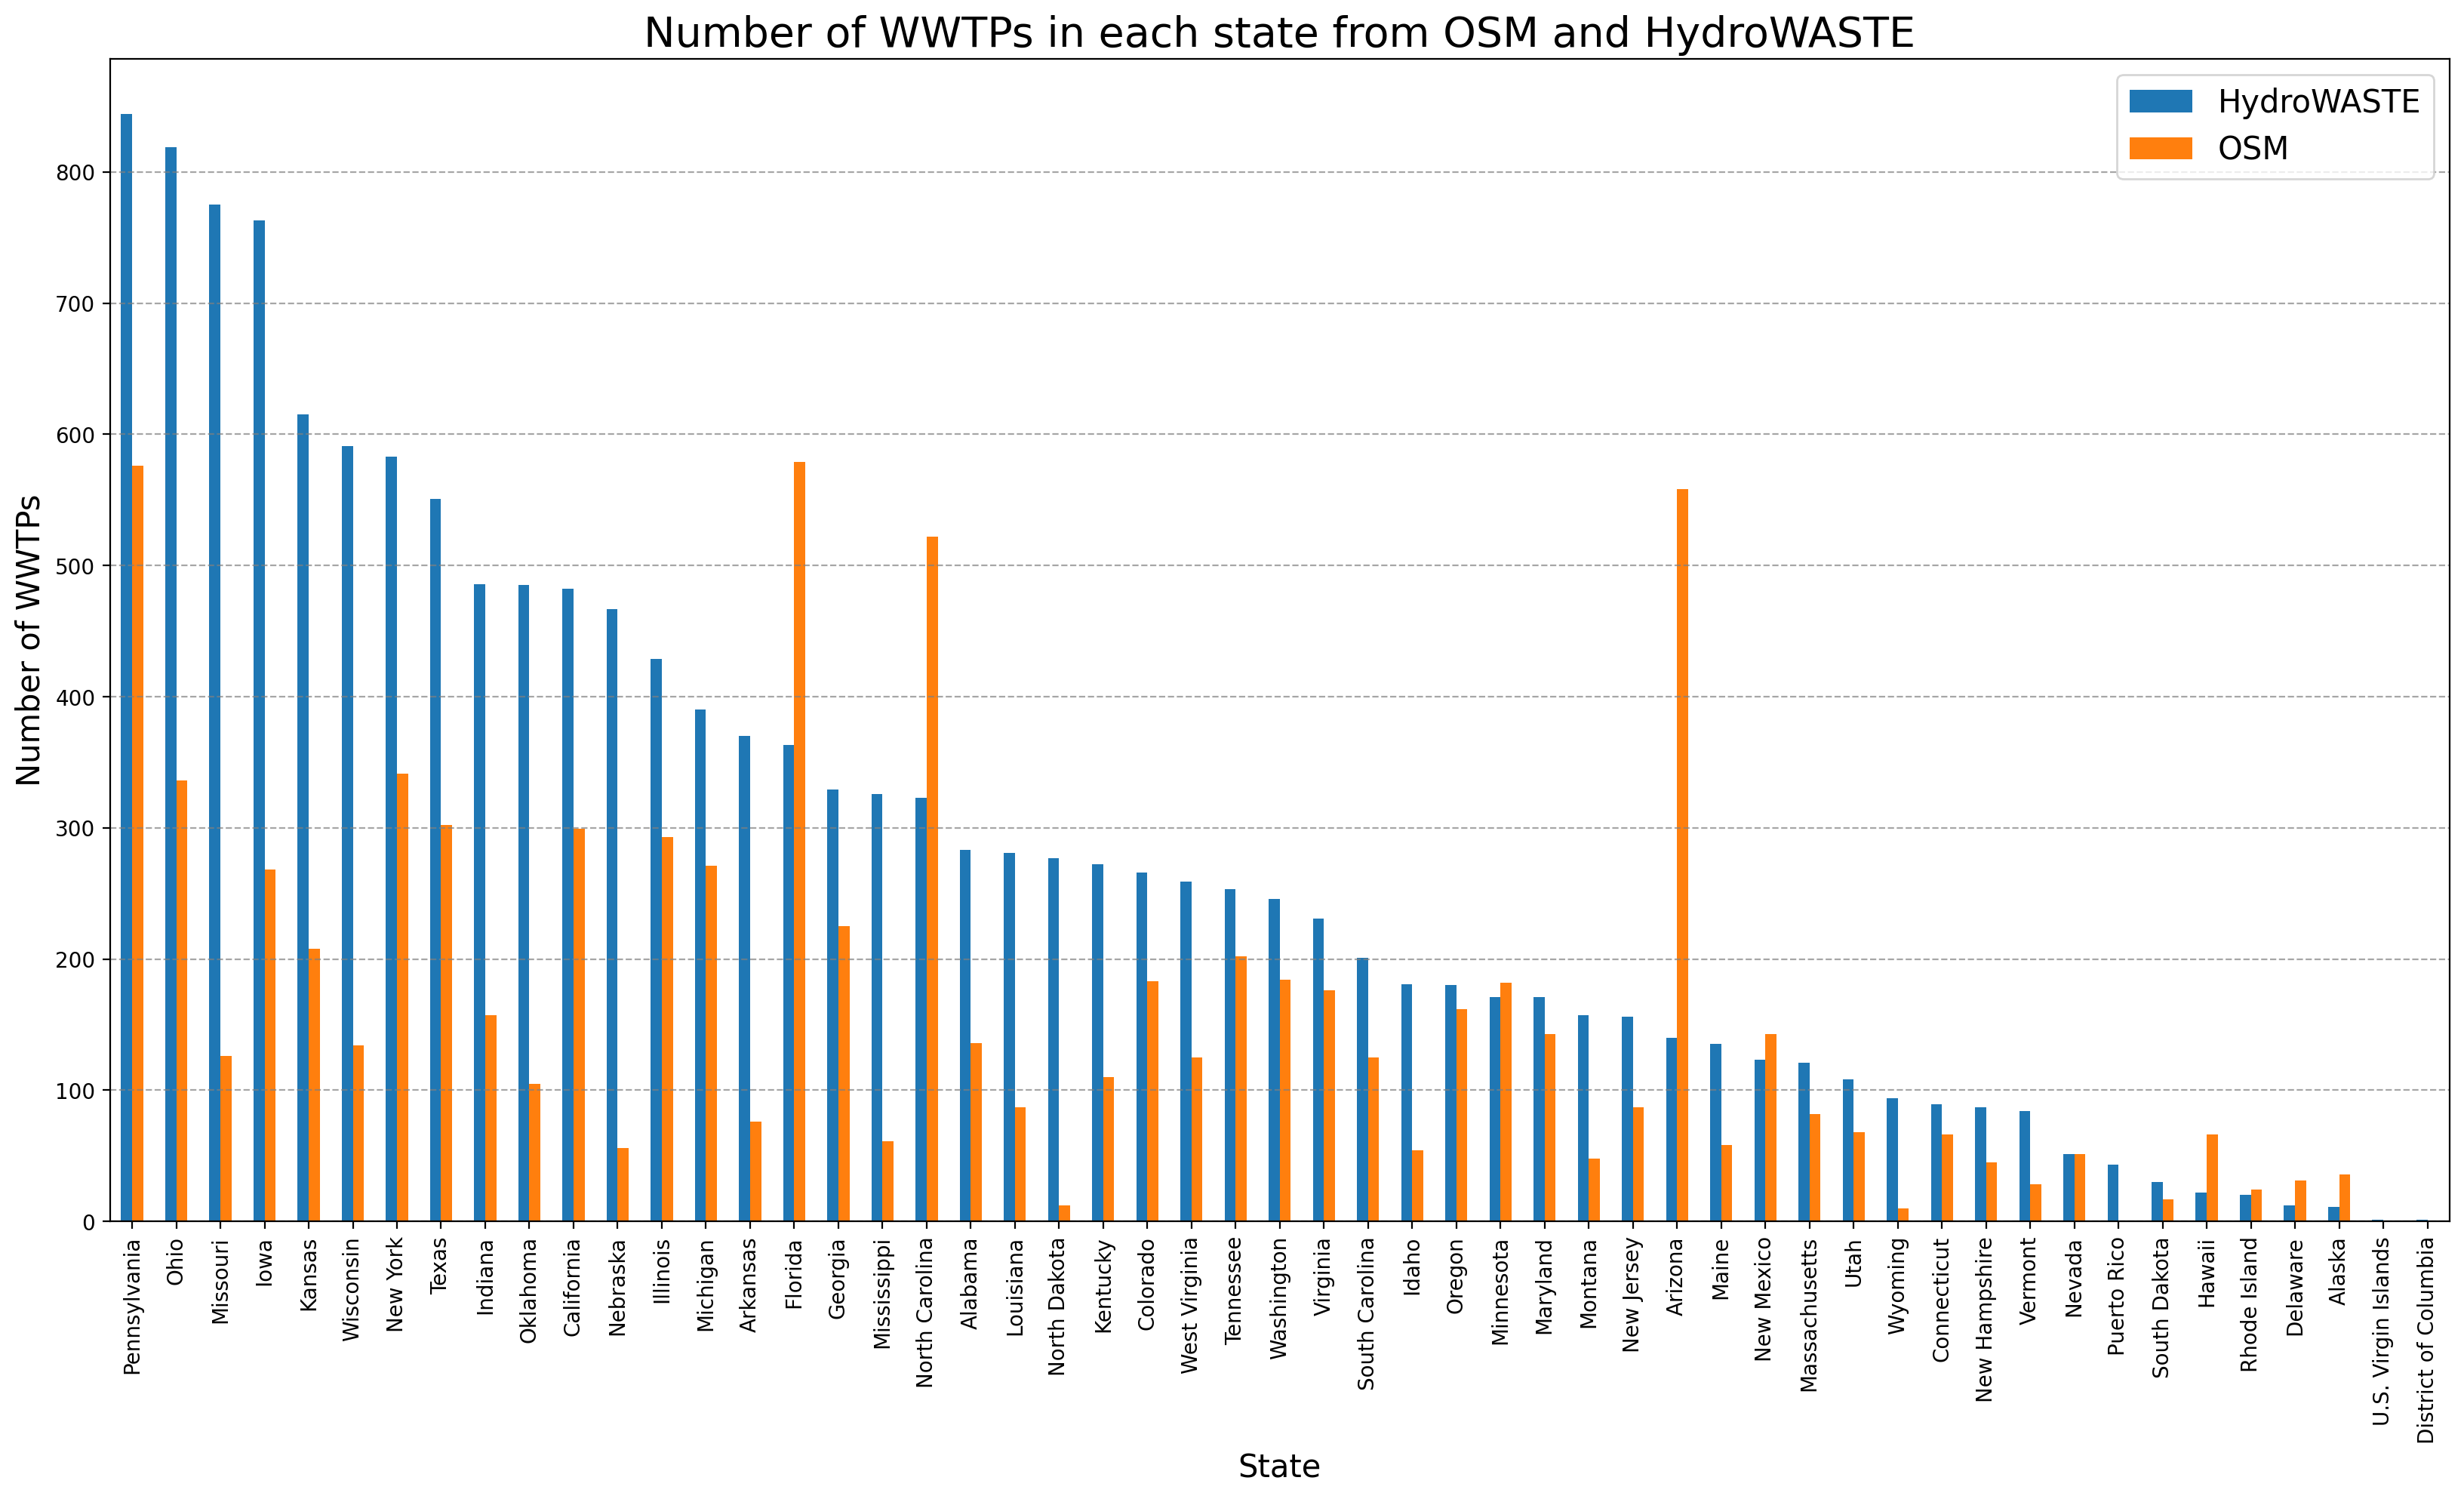

In [27]:
# plot the number of WWTPs in each state from OSM and HydroWASTE sort descending by hw_count
hw_osm_cnt_by_state.sort_values("hw_count", ascending=False, inplace=True)
hw_osm_cnt_by_state.plot(
    x="NAME", y=["hw_count", "osm_count"], kind="bar", figsize=(20, 10)
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Number of WWTPs", fontsize=15)
plt.title("Number of WWTPs in each state from OSM and HydroWASTE", fontsize=20)
# add horizontal y ticks lines
plt.grid(axis="y", linestyle="--", alpha=0.7, color="grey")
plt.legend(["HydroWASTE", "OSM"], fontsize=15)
plt.show()

In [28]:
# states when the number of WWTPs in OSM is larger than that in HydroWASTE
hw_osm_cnt_by_state[hw_osm_cnt_by_state["osm_count"] > hw_osm_cnt_by_state["hw_count"]]

,state,osm_count,NAME,hw_count
9,Florida,579.0,Florida,363
33,North Carolina,522.0,North Carolina,323
23,Minnesota,182.0,Minnesota,171
2,Arizona,558.0,Arizona,140
31,New Mexico,143.0,New Mexico,123
11,Hawaii,66.0,Hawaii,22
40,Rhode Island,24.0,Rhode Island,20
7,Delaware,31.0,Delaware,12
1,Alaska,36.0,Alaska,11
